In [1]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def define_classes(labels):
    classes = {}
    label = []
    c = 0
    for i,j in labels:
        if j.decode('utf-8') not in classes:
            classes[j.decode('utf-8')] = c
            c += 1
        label.append(classes[j.decode('utf-8')])    
    return classes, np.array(label)

In [3]:
def reshape_images(images):
    train_im = []  
    for i in range(images.shape[0]):
        train_im.append(np.array(images[i][1]))
    return np.array(train_im)

In [4]:
#Separate data between train and valid sets
classes, train_labels = define_classes(np.genfromtxt('train_labels.csv',
            names=True, delimiter=',', dtype=[('Id', 'i8'), ('Category', 'S5')]))
valid_labels = train_labels[9000:]
train_labels = train_labels[:9000]
train_images = reshape_images(np.load(
    'Processed_andCleaned_train_images.npy', encoding='latin1'))
test_images = reshape_images(np.load(
    'Processed_andCleaned_test_images.npy', encoding='latin1'))
valid_images = train_images[9000:]/np.max(train_images)
train_images = train_images[:9000]/np.max(train_images)
test_images = test_images/np.max(test_images)

In [5]:
#fonction to extract hu_moments from images
def hu_moments(image):
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [6]:
#Features extraction
train_features = np.zeros((len(train_images), 7))
valid_features = np.zeros((len(valid_images), 7))
test_features  = np.zeros((len(test_images),  7)) 
for i, image in enumerate(train_images):
    moments = hu_moments(image)
    train_features[i] = -np.sign(moments)*np.log(np.abs(moments))
for i, image in enumerate(valid_images):
    moments = hu_moments(image)
    valid_features[i] = -np.sign(moments)*np.log(np.abs(moments))
for i, image in enumerate(test_images):
    moments = hu_moments(image)
    test_features[i] = -np.sign(moments)*np.log(np.abs(moments))

In [9]:
#Learning curves
training_accuracy, valid_accuracy = [],[]
for i in range(15):
    clf = svm.LinearSVC(penalty='l2', loss = 'squared_hinge',
                        dual = False, tol = 0.0001, max_iter = i)
    clf.fit(train_features, train_labels)
    training_accuracy.append(1-clf.score(train_features,train_labels))
    valid_accuracy.append(1-clf.score(valid_features,valid_labels))

D:\Programmes\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programmes\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programmes\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programmes\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programmes\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

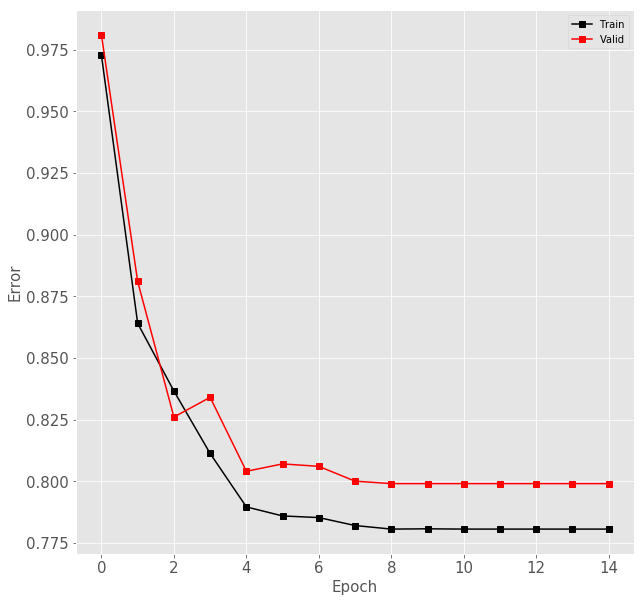

In [10]:
plt.style.use('ggplot')     
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,10))

ax.plot(range(15),training_accuracy, 'sk-', label='Train')
ax.plot(range(15),valid_accuracy, 'sr-', label='Valid')
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.legend()
plt.savefig('Error.png')

In [21]:
#Generate predictions on test images
predictions = clf.predict(test_features)

In [26]:
import csv

In [27]:
classes = {3:'apple',21:'empty',23:'moustache',6:'mouth',
        30:'mug',19:'nail', 13:'nose',22:'octagon',24:'paintbrush',
        25:'panda',26:'parrot',9:'peanut',16:'pear',20:'pencil',
        18:'penguin',17:'pillow',5:'pineapple',15:'pool',10:'rabbit',
        29:'rhinoceros',1:'rifle',8:'rollerskates',12:'sailboat',
        2:'scorpion',27:'screwdriver', 0:'shovel',11:'sink',
        7:'skateboard',14:'skull',4:'spoon',28:'squiggle'}

In [31]:
#Export test predictions
with open('submission.csv', 'w') as submission:
    writer = csv.writer(submission, delimiter = ',',
            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i, pred in enumerate(predictions):
        writer.writerow([str(i), classes[pred]])